In [1]:
from PIL import Image
import h5py
import os
import numpy as np
import seaborn as sns
from convert_h5_to_png import PALETTE, DATASET_PATHS
from collections import Counter

PATH = '/itet-stor/klanna/bmicdatasets_bmicnas02/Sharing/klanna/processed_data/'

def get_3d_mask(masks):
    masks_3d = np.zeros([256, 256, 3])
    for i in range(256):
        for j in range(256):
            l = int(masks[i, j])
            masks_3d[i, j, :] = np.array(PALETTE[l])
    return Image.fromarray(np.uint8(masks_3d)).convert('RGB')

def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

def get_dataset(dataset='hcp1', split='train'):    
    dataset_folder = DATASET_PATHS[dataset][split]
    h5_fh = h5py.File(f'{PATH}/{dataset_folder}', 'r')
    print(list(h5_fh.keys()))
    print(len(h5_fh['images']), 'images')
    print('images:', h5_fh['images'][:].min(), h5_fh['images'][:].max())
    print('labels:', np.unique(h5_fh['labels'][:]))
    
    return h5_fh

def get_freq(targets):
    counter_classes = dict(Counter(targets))
    total = sum(counter_classes.values())
    counter_classes_norm = {}
    for k in counter_classes:
        counter_classes_norm[k] = [counter_classes[k] / total]
        
    df_targets_per_img_patient = pd.DataFrame(counter_classes_norm.values(), columns=['freq'])
    df_targets_per_img_patient['classes'] = [str(c) for c in counter_classes_norm.keys()]
    
    return df_targets_per_img_patient

PALETTE_hex = [rgb_to_hex(*PALETTE[i]) for i in range(len(PALETTE))]
sns.color_palette(PALETTE_hex)

[(0.6, 0.6, 0.6),
 (0.5019607843137255, 0.25098039215686274, 0.5019607843137255),
 (0.9568627450980393, 0.13725490196078433, 0.9098039215686274),
 (0.27450980392156865, 0.27450980392156865, 0.27450980392156865),
 (0.4, 0.4, 0.611764705882353),
 (0.7450980392156863, 0.6, 0.6),
 (0.9803921568627451, 0.6666666666666666, 0.11764705882352941),
 (0.8627450980392157, 0.8627450980392157, 0.0),
 (0.4196078431372549, 0.5568627450980392, 0.13725490196078433),
 (0.596078431372549, 0.984313725490196, 0.596078431372549),
 (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
 (0.8627450980392157, 0.0784313725490196, 0.23529411764705882),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 0.5568627450980392),
 (0.0, 0.0, 0.27450980392156865)]

In [2]:
DATASET_PATHS.keys()

dict_keys(['hcp1', 'hcp2', 'abide_caltech', 'abide_stanford', 'nci', 'pirad_erc', 'acdc', 'rvsc'])

['images', 'labels', 'nx', 'ny', 'nz', 'patnames', 'px', 'py', 'pz']
2560 images
images: 0.0 1.0
labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


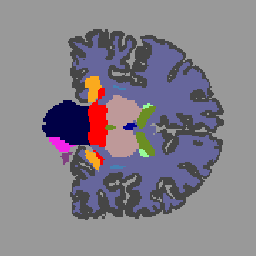

In [7]:
split='train'
dataset = 'abide_caltech'
h5_fh = get_dataset(dataset, split)
get_3d_mask(h5_fh['labels'][110])

In [9]:
import pandas as pd
df_targets_all_patient = get_freq(list(h5_fh['labels'][:].reshape(-1)))

In [17]:
# class_names = [str(i) for i in range(1, 16)]
# cmap_hex = dict(zip(class_names, PALETTE_hex))
# sns.barplot(df_targets_all_patient.classes, df_targets_all_patient.freq, palette=cmap_hex)

['images', 'labels', 'nx', 'ny', 'nz', 'patnames', 'px', 'py', 'pz']
656 images
images: 0.0 1.0
labels: [0. 1. 2.]


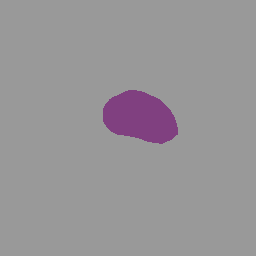

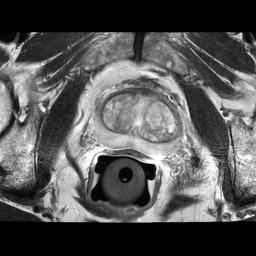

In [51]:
split='train'
dataset = 'pirad_erc'
h5_fh = get_dataset(dataset, split)
labels = get_3d_mask(h5_fh['labels'][110])
display(labels)
img_pil = Image.fromarray(np.uint8(h5_fh['images'][110]*255)).convert('RGB')
display(img_pil)

In [42]:
split='train'
dataset = 'nci'
dataset_folder = DATASET_PATHS[dataset][split]
h5_fh = h5py.File(f'{PATH}/{dataset_folder}', 'r')# labels = get_3d_mask(h5_fh['labels'][110])
# display(labels)
# img_pil = Image.fromarray(np.uint8(h5_fh['images'][110]*255)).convert('RGB')
# display(img_pil)
h5_fh.keys()

In [48]:
for split in ['train', 'validation', 'test']:
    print(split)
    images = h5_fh['images_'+split][:]
    masks = h5_fh['masks_'+split][:]
    print(len(images), 'images')
    print('images:', images.min(), images.max())
    print('labels:', np.unique(masks))

train
286 images
images: 0.0 1.0
labels: [0 1 2]
validation
98 images
images: 0.0 1.0
labels: [0 1 2]
test
194 images
images: 0.0 1.0
labels: [0 1 2]


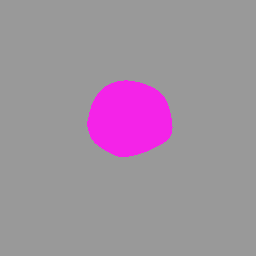

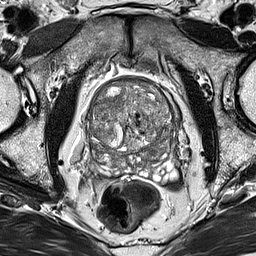

In [50]:
labels = get_3d_mask(masks[110])
display(labels)
img_pil = Image.fromarray(np.uint8(images[110]*255)).convert('RGB')
display(img_pil)

In [26]:
split='all'
dataset = 'acdc'
dataset_folder = DATASET_PATHS[dataset][split]
h5_fh = h5py.File(f'{PATH}/{dataset_folder}', 'r')# labels = get_3d_mask(h5_fh['labels'][110])
# display(labels)
# img_pil = Image.fromarray(np.uint8(h5_fh['images'][110]*255)).convert('RGB')
# display(img_pil)
h5_fh.keys()

<KeysViewHDF5 ['cardiac_phase_test', 'cardiac_phase_train', 'cardiac_phase_validation', 'diagnosis_test', 'diagnosis_train', 'diagnosis_validation', 'height_test', 'height_train', 'height_validation', 'images_test', 'images_train', 'images_validation', 'labels_test', 'labels_train', 'labels_validation', 'nx_test', 'nx_train', 'nx_validation', 'ny_test', 'ny_train', 'ny_validation', 'nz_test', 'nz_train', 'nz_validation', 'patient_id_test', 'patient_id_train', 'patient_id_validation', 'px_test', 'px_train', 'px_validation', 'py_test', 'py_train', 'py_validation', 'pz_test', 'pz_train', 'pz_validation', 'weight_test', 'weight_train', 'weight_validation']>

In [27]:
for split in ['test']:
    print(split)
    images = h5_fh['images_'+split][:]
    masks = h5_fh['labels_'+split][:]
    print(len(images), 'images')
    print('images:', images.min(), images.max())
    print('labels:', np.unique(masks))

test
386 images
images: 0.0 1.0
labels: [0 1]


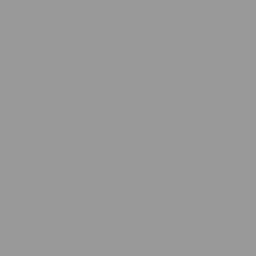

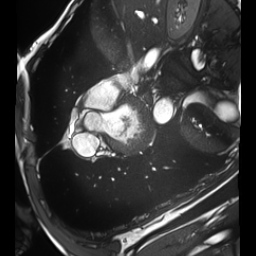

In [34]:
idx = 10
labels = get_3d_mask(masks[idx])
display(labels)
img_pil = Image.fromarray(np.uint8(images[idx]*255)).convert('RGB')
display(img_pil)

In [29]:
for i in range(len(masks)):
    print(i, np.unique(masks[i]))

0 [0]
1 [0 1]
2 [0 1]
3 [0 1]
4 [0 1]
5 [0 1]
6 [0 1]
7 [0 1]
8 [0 1]
9 [0 1]
10 [0]
11 [0]
12 [0 1]
13 [0 1]
14 [0 1]
15 [0 1]
16 [0 1]
17 [0 1]
18 [0 1]
19 [0]
20 [0 1]
21 [0 1]
22 [0 1]
23 [0 1]
24 [0 1]
25 [0 1]
26 [0 1]
27 [0 1]
28 [0 1]
29 [0 1]
30 [0]
31 [0 1]
32 [0 1]
33 [0 1]
34 [0 1]
35 [0 1]
36 [0 1]
37 [0 1]
38 [0 1]
39 [0]
40 [0 1]
41 [0 1]
42 [0 1]
43 [0 1]
44 [0 1]
45 [0 1]
46 [0 1]
47 [0 1]
48 [0]
49 [0 1]
50 [0 1]
51 [0 1]
52 [0 1]
53 [0 1]
54 [0 1]
55 [0 1]
56 [0 1]
57 [0]
58 [0 1]
59 [0 1]
60 [0 1]
61 [0 1]
62 [0 1]
63 [0 1]
64 [0 1]
65 [0 1]
66 [0 1]
67 [0 1]
68 [0 1]
69 [0 1]
70 [0 1]
71 [0 1]
72 [0 1]
73 [0 1]
74 [0 1]
75 [0 1]
76 [0 1]
77 [0 1]
78 [0 1]
79 [0 1]
80 [0 1]
81 [0]
82 [0]
83 [0]
84 [0]
85 [0 1]
86 [0 1]
87 [0 1]
88 [0 1]
89 [0 1]
90 [0]
91 [0]
92 [0]
93 [0 1]
94 [0 1]
95 [0 1]
96 [0 1]
97 [0 1]
98 [0 1]
99 [0 1]
100 [0]
101 [0]
102 [0]
103 [0]
104 [0 1]
105 [0 1]
106 [0 1]
107 [0]
108 [0]
109 [0]
110 [0]
111 [0]
112 [0 1]
113 [0 1]
114 [0 1]
115 [0 1